<a href="https://www.kaggle.com/code/punyamodi/house-price-competitions?scriptVersionId=140570111" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**This notebook is an exercise in the [Introduction to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/machine-learning-competitions).**

---


# Introduction

In this exercise, you will create and submit predictions for a Kaggle competition. You can then improve your model (e.g. by adding features) to apply what you've learned and move up the leaderboard.

Begin by running the code cell below to set up code checking and the filepaths for the dataset.

In [1]:
# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex7 import *

# Set up filepaths
import os
if not os.path.exists("../input/train.csv"):
    os.symlink("../input/home-data-for-ml-course/train.csv", "../input/train.csv")  
    os.symlink("../input/home-data-for-ml-course/test.csv", "../input/test.csv") 

In [2]:
def Transformation1(home_data):
    home_data.dropna()

    numerics = ['int64', 'float64']
    home_data1 = home_data.select_dtypes(include=numerics)

    home_data1.fillna(0)

    try:
        y = home_data1.SalePrice
        home_data1.drop(["SalePrice"],axis=1)
        print(y)
        print(y.shape)
    except:
        pass
    X=home_data1.fillna(0)
    print(X)
    print(X.shape)
    try:
        return X,y
    except:
        return X

Here's some of the code you've written so far. Start by running it again.

In [3]:
import pandas as pd
# Load the data, and separate the target
iowa_file_path = '../input/train.csv'
home_data = pd.read_csv(iowa_file_path)

X,y=Transformation1(home_data)


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64
(1460,)
        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     971

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


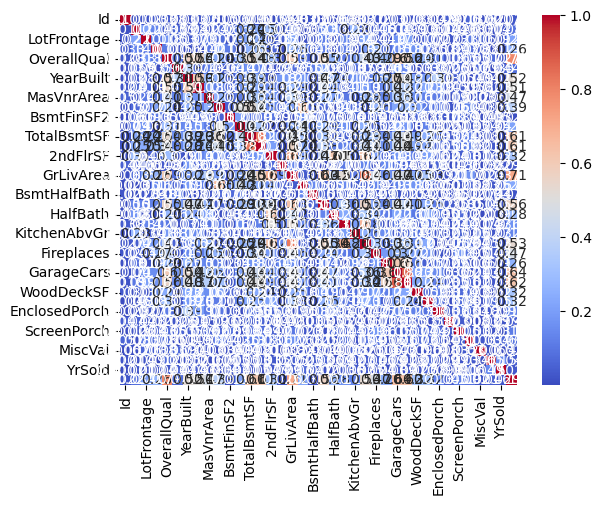

(1460, 38)


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Creating the correlation matrix of the iris dataset
X1 = X.corr().abs()


# Create the heatmap using the `heatmap` function of Seaborn
sns.heatmap(X1, cmap='coolwarm', annot=True)

# Display the heatmap using the `show` method of the `pyplot` module from matplotlib.
plt.show()
print(X.shape)

In [5]:
upper = X1.where(np.triu(np.ones(X1.shape), k=1).astype(np.bool))

# find features with correlation greater than 0.95

to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# drop highly correlated features

X.drop(to_drop, axis=1, inplace=True)

/tmp/ipykernel_32/64059484.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = X1.where(np.triu(np.ones(X1.shape), k=1).astype(np.bool))


In [6]:
print(X.shape)

(1460, 34)


In [11]:
# Import helpful libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [14]:
# Define a random forest model
rf_model = RandomForestRegressor(n_estimators=100,random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 16,430


In [15]:
import xgboost as xgb
my_model = xgb.XGBClassifier()
my_model.fit(train_X, train_y)
predictions1 = rf_model.predict(val_X)
mae1 = mean_absolute_error(predictions1, val_y)

print("Validation MAE for Random Forest Model: {:,.0f}".format(mae1))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413
 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431
 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467
 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485
 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503
 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521
 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539
 540 541 542 543 544 545 546 547 548 549 550 551 552 553], got [ 34900  35311  37900  39300  52000  52500  55000  58500  60000  66500
  67000  68400  68500  72500  75000  75500  76500  78000  79000  79900
  80000  80500  81000  82000  82500  83500  84000  84500  84900  85000
  85400  86000  87000  87500  88000  89000  89471  89500  90000  90350
  91000  91300  91500  92000  92900  93000  94000  94500  94750  95000
  96500  97000  97500  98000  98300  99900 100000 101000 102000 104900
 105000 105500 105900 106500 107000 107400 107500 107900 108000 108500
 108959 109000 109008 109500 109900 110000 110500 111000 112000 112500
 113000 114500 114504 115000 116000 116050 116500 117000 117500 118000
 118400 118500 118964 119000 119200 119500 119750 119900 120000 120500
 121000 121500 121600 122000 122900 123000 123500 123600 124000 124500
 124900 125000 125500 126000 126175 126500 127000 127500 128000 128200
 128500 128900 128950 129000 129500 129900 130000 130250 130500 131000
 131400 131500 132000 132500 133000 133500 133700 133900 134000 134432
 134500 134800 134900 135000 135500 135750 135900 135960 136000 136500
 136900 137000 137450 137500 138000 138500 138800 138887 139000 139400
 139500 139600 139900 139950 140000 140200 141000 142000 142125 142500
 142600 142953 143000 143250 143500 143750 143900 144000 144152 144500
 145000 145250 145500 146000 146500 146800 147000 147400 147500 148000
 148500 148800 149000 149300 149350 149500 149700 149900 150000 150500
 150750 150900 151000 151500 152000 153000 153337 153500 153575 153900
 154000 154300 154500 154900 155000 155835 155900 156000 156500 156932
 157000 157500 157900 158000 158900 159000 159434 159500 160000 161000
 161750 162000 162500 162900 163000 163500 164000 164500 164700 164900
 165000 165150 165400 165500 165600 167000 167240 167500 167900 168000
 168500 169000 169500 169900 170000 171000 171750 171900 172400 172785
 173000 173500 173733 173900 174000 174500 174900 175000 175500 175900
 176000 176432 176485 176500 177000 177500 178000 178740 178900 179000
 179200 179400 179600 179665 179900 180000 180500 181000 181134 181500
 181900 182000 183200 183500 183900 184000 184100 184750 184900 185000
 185750 185850 185900 186000 186500 187000 187500 187750 188000 188500
 188700 189000 189950 190000 191000 192000 192140 192500 193000 193500
 193879 194000 194500 194700 195000 195400 196000 196500 197000 197500
 197900 198500 198900 199900 200000 200141 200500 200624 201000 201800
 202500 202665 202900 203000 204000 204900 205000 206000 206300 206900
 207000 207500 208300 208500 208900 209500 210000 211000 212000 212900
 213000 213250 213490 213500 214000 214500 214900 215000 215200 216000
 216500 216837 217000 218000 219210 219500 220000 221000 222000 222500
 223000 223500 224000 225000 226000 226700 227000 227680 227875 228500
 229000 229456 230000 230500 231500 232000 233000 233170 233230 234000
 235000 235128 236000 236500 237000 237500 239000 239686 239799 240000
 241500 242000 243000 244000 244400 245000 245350 245500 246578 248000
 248328 248900 250000 250580 251000 252000 252678 253000 254000 255000
 255500 255900 256000 256300 257000 257500 259000 259500 260000 260400
 261500 262000 262500 263000 264561 265000 265900 265979 266000 266500
 268000 269500 269790 270000 271900 272000 274300 274725 274900 274970
 275000 275500 276000 277000 277500 278000 279500 280000 281213 282922
 283463 284000 285000 286000 287000 287090 290000 293077 295493 299800
 301000 301500 302000 303477 305000 305900 307000 310000 311500 311872
 312500 313000 314813 315000 315750 316600 318000 318061 319000 319900
 320000 324000 325000 325300 326000 328000 333168 335000 336000 337000
 340000 342643 345000 350000 359100 369900 372402 372500 375000 377500
 378500 380000 381000 383970 385000 386250 392000 392500 394432 394617
 395000 395192 402000 402861 410000 412500 415298 423000 424870 426000
 430000 437154 440000 446261 451950 465000 475000 501837 538000 555000
 556581 582933 611657 755000]

# Train a model for the competition

The code cell above trains a Random Forest model on **`train_X`** and **`train_y`**.  

Use the code cell below to build a Random Forest model and train it on all of **`X`** and **`y`**.

In [17]:
# To improve accuracy, create a new Random Forest model which you will train on all training data
rf_model_on_full_data = RandomForestRegressor(random_state=1)

# fit rf_model_on_full_data on all data from the training data
rf_model_on_full_data.fit(X,y)

RandomForestRegressor(random_state=1)

Now, read the file of "test" data, and apply your model to make predictions.

In [18]:
# path to file you will use for predictions
test_data_path = '../input/test.csv'

# read test data file using pandas
test_data = pd.read_csv(test_data_path)

test_X=Transformation1(test_data)
for i in to_drop:
    try:
        test_X.drop(i, axis=1, inplace=True)
    except:
        pass

# make predictions which we will submit. 
test_preds = rf_model_on_full_data.predict(test_X)

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0     1461          20         80.0    11622            5            6   
1     1462          20         81.0    14267            6            6   
2     1463          60         74.0    13830            5            5   
3     1464          60         78.0     9978            6            6   
4     1465         120         43.0     5005            8            5   
...    ...         ...          ...      ...          ...          ...   
1454  2915         160         21.0     1936            4            7   
1455  2916         160         21.0     1894            4            5   
1456  2917          20        160.0    20000            5            7   
1457  2918          85         62.0    10441            5            5   
1458  2919          60         74.0     9627            7            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  GarageArea  \
0          1961          1961        

In [19]:
"""test_preds1 = my_model.predict(test_X)"""

'test_preds1 = my_model.predict(test_X)'

Before submitting, run a check to make sure your `test_preds` have the right format.

In [20]:
# Check your answer (To get credit for completing the exercise, you must get a "Correct" result!)
step_1.check()
# step_1.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

# Generate a submission

Run the code cell below to generate a CSV file with your predictions that you can use to submit to the competition.

In [22]:
# Run the code to save predictions in the format used for competition scoring

output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': test_preds})
output.to_csv('submission.csv', index=False)


# Submit to the competition

To test your results, you'll need to join the competition (if you haven't already).  So open a new window by clicking on **[this link](https://www.kaggle.com/c/home-data-for-ml-course)**.  Then click on the **Join Competition** button.

![join competition image](https://storage.googleapis.com/kaggle-media/learn/images/axBzctl.png)

Next, follow the instructions below:
1. Begin by clicking on the **Save Version** button in the top right corner of the window.  This will generate a pop-up window.  
2. Ensure that the **Save and Run All** option is selected, and then click on the **Save** button.
3. This generates a window in the bottom left corner of the notebook.  After it has finished running, click on the number to the right of the **Save Version** button.  This pulls up a list of versions on the right of the screen.  Click on the ellipsis **(...)** to the right of the most recent version, and select **Open in Viewer**.  This brings you into view mode of the same page. You will need to scroll down to get back to these instructions.
4. Click on the **Data** tab near the top of the screen.  Then, click on the file you would like to submit, and click on the **Submit** button to submit your results to the leaderboard.

You have now successfully submitted to the competition!

If you want to keep working to improve your performance, select the **Edit** button in the top right of the screen. Then you can change your code and repeat the process. There's a lot of room to improve, and you will climb up the leaderboard as you work.


# Continue Your Progress
There are many ways to improve your model, and **experimenting is a great way to learn at this point.**

The best way to improve your model is to add features.  To add more features to the data, revisit the first code cell, and change this line of code to include more column names:
```python
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
```

Some features will cause errors because of issues like missing values or non-numeric data types.  Here is a complete list of potential columns that you might like to use, and that won't throw errors:
- 'MSSubClass'
- 'LotArea'
- 'OverallQual' 
- 'OverallCond' 
- 'YearBuilt'
- 'YearRemodAdd' 
- '1stFlrSF'
- '2ndFlrSF' 
- 'LowQualFinSF' 
- 'GrLivArea'
- 'FullBath'
- 'HalfBath'
- 'BedroomAbvGr' 
- 'KitchenAbvGr' 
- 'TotRmsAbvGrd' 
- 'Fireplaces' 
- 'WoodDeckSF' 
- 'OpenPorchSF'
- 'EnclosedPorch' 
- '3SsnPorch' 
- 'ScreenPorch' 
- 'PoolArea' 
- 'MiscVal' 
- 'MoSold' 
- 'YrSold'

Look at the list of columns and think about what might affect home prices.  To learn more about each of these features, take a look at the data description on the **[competition page](https://www.kaggle.com/c/home-data-for-ml-course/data)**.

After updating the code cell above that defines the features, re-run all of the code cells to evaluate the model and generate a new submission file.  


# What's next?

As mentioned above, some of the features will throw an error if you try to use them to train your model.  The **[Intermediate Machine Learning](https://www.kaggle.com/learn/intermediate-machine-learning)** course will teach you how to handle these types of features. You will also learn to use **xgboost**, a technique giving even better accuracy than Random Forest.

The **[Pandas](https://kaggle.com/Learn/Pandas)** course will give you the data manipulation skills to quickly go from conceptual idea to implementation in your data science projects. 

You are also ready for the **[Deep Learning](https://kaggle.com/Learn/intro-to-Deep-Learning)** course, where you will build models with better-than-human level performance at computer vision tasks.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/intro-to-machine-learning/discussion) to chat with other learners.*